# Gran Tienda Online 

En esta investigación se realizarán análisis a tres datsets de la tienda online, para estudiar los datos copilados de las hipótesis que pueden ayudar a aumentar ingresos, con el fin de priorizarlas, lanzar un test A/B, y analizar los resultados.


Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Priorizar las hipótesis.
4. Análisis de un test A/B.
5. Escribir una conclusión general.

## Inicialización

In [42]:
#Cargar las librerías
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats
import numpy as np
import pandas as pd

### Cargar los datos

In [2]:
hypothesis_data = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypothesis_data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
orders_data = pd.read_csv('/datasets/orders_us.csv', sep=',')
orders_data

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [4]:
visits_data = pd.read_csv('/datasets/visits_us.csv', sep=',')
visits_data

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


### Explorar la información general.

In [5]:
hypothesis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
hypothesis_data.duplicated().sum()

0

In [7]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
orders_data.duplicated().sum()

0

In [9]:
orders_data['date'] = pd.to_datetime(orders_data['date'])
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [10]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visits_data.duplicated().sum()

0

In [12]:
visits_data['date'] = pd.to_datetime(visits_data['date'])
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Se importaron los tres datasets, y se pudo observar que los datos se encuentran en orden, solo que los dataframes de visitas y ordenes la columna 'date', estaba en formato object y se le cambió a formato datetime.

## Priorizar hipótesis

### Aplicar el framework ICE para priorizar hipótesis

In [13]:
print(hypothesis_data)
print()
hypothesis_data['ICE'] = (hypothesis_data['Impact'] * hypothesis_data['Confidence']) / hypothesis_data['Effort']
print(hypothesis_data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  

                                          Hypoth

Con el framework ICE las hipótesis más prometedoras son las 8, 0 y 7 

### Aplicar el framework RICE para priorizar hipótesis

In [14]:
print(hypothesis_data)
print()
hypothesis_data['RICE'] = (hypothesis_data['Reach'] * hypothesis_data['Impact'] * hypothesis_data['Confidence']) / hypothesis_data['Effort']
print(hypothesis_data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort        ICE  
0           8       6  13.333333  
1           4      10   2.000000  
2           7       3   7.000000  
3           3       8   1.125000  
4           1       1   1.000000  
5           2       3   1.333333  
6           8       3   8.000000  
7        

En este caso, las hipótesis más prometedoras son las 7, 2 y 0. Las hipótesis 7 y 0 vuelven a estar en el top 3 junto con la 6 y 2; esto se debe a que sus reach son mayores que la de la hipótesis 8. Además, en este caso la hipótesis 7 llega a ser la primera con una gran diferencia, esto se debe a que su puntaje de reach es mayor que al de las otras hipótesis.

## Análisis de test A/B

In [15]:
date_groups = orders_data[['date', 'group']].drop_duplicates()

se crea la variable date_groups para crear una matriz con valores únicos de parejas de fecha-grupo

In [16]:
orders_aggregated = date_groups.apply(lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'], orders_data['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


Para obtener los datos diarios acumulados agregados sobre los pedidos e ingresos

In [17]:
visitors_aggregated = date_groups.apply(lambda x: visits_data[np.logical_and(visits_data['date'] <= x['date'], visits_data['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Para obtener los datos diarios acumulados agregados sobre los visitantes


### Ingreso acumulado y Pedido promedio acumulado por grupo 

In [18]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumulative_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [19]:
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders', 'visits']]
cumulative_revenue_A.head(10)

,date,revenue,orders,visits
0,2019-08-01,2356.8,24,719
2,2019-08-02,3860.3,44,1338
4,2019-08-03,5675.5,68,1845
6,2019-08-04,6822.1,84,2562
8,2019-08-05,8810.2,109,3318
10,2019-08-06,9600.0,127,3985
12,2019-08-07,11842.9,145,4629
14,2019-08-08,13373.3,161,5239
16,2019-08-09,16320.4,177,5856
18,2019-08-10,19608.6,193,6262


En este dataframe se puede observar los pedidos e ingresos acumulados por día del grupo A

In [20]:
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders', 'visits']]
cumulative_revenue_B.head(10)

,date,revenue,orders,visits
1,2019-08-01,1620.0,21,713
3,2019-08-02,4243.8,45,1294
5,2019-08-03,6050.6,61,1803
7,2019-08-04,7767.9,78,2573
9,2019-08-05,9262.9,101,3280
11,2019-08-06,13069.3,129,3935
13,2019-08-07,16600.8,153,4644
15,2019-08-08,20088.6,180,5298
17,2019-08-09,22646.7,205,5908
19,2019-08-10,24367.1,228,6277


En este dataframe se puede observar los pedidos e ingresos acumulados por día del grupo B

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

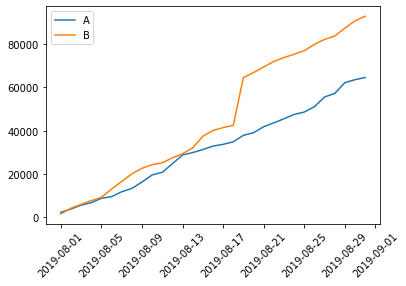

In [21]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label = 'A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label = 'B')
plt.legend()
plt.xticks(rotation=45)

En el gráfico, se puede apreciar que el ingreso acumulado del grupo B sacó ventaja a partir del 17 de agosto del 2019, y de ahí en adelante siguió para arriba.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

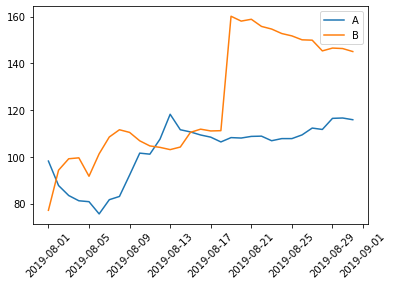

In [22]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label = 'A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label = 'B')
plt.legend()
plt.xticks(rotation=45)

En el gráfico, se puede apreciar que los pedidos acumulados promedios del grupo B sacaron ventaja a partir del 17 de agosto del 2019, y de ahí en adelante siguió para arriba.

### diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

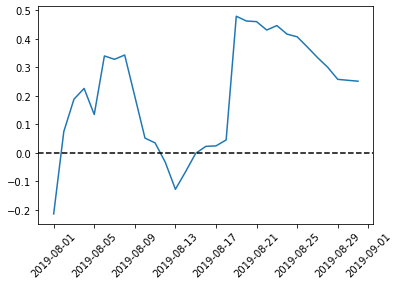

In [23]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)

Se puede apreciar en el gráfico, que hubo cambios repentinos, talvez tengan que ver con pedidos muy grandes en uno de los grupos.

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día

In [24]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']
cumulative_data.head(10)

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856
5,2019-08-03,B,61,59,6050.6,1803,0.033833
6,2019-08-04,A,84,77,6822.1,2562,0.032787
7,2019-08-04,B,78,75,7767.9,2573,0.030315
8,2019-08-05,A,109,100,8810.2,3318,0.032851
9,2019-08-05,B,101,98,9262.9,3280,0.030793


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

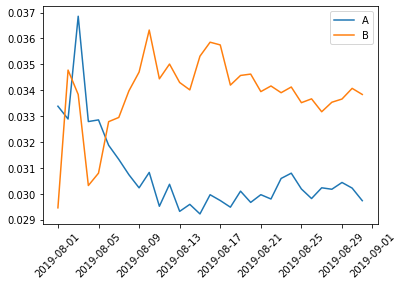

In [25]:
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)

Al inicio el grupo tenía una tasa de conversión más alta, pero el grupo B tomó la delantera y se mantuvo casi constante de ahi para adelante.

No handles with labels found to put in legend.


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

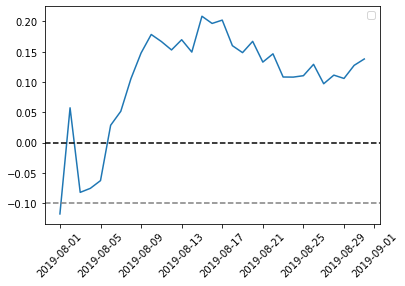

In [26]:
merged_cumulative_conversions = cumulative_data_A[['date', 'conversion']].merge(cumulative_data_B[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA'] - 1)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)

Este fue el gráfico de la diferencia relativa de ambas tasas de conversión de los grupos. El grupo B fue en líder de conversión desde casi del inicio.

### número de pedidos por usuario

In [27]:
orders_by_users = (orders_data.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
orders_by_users.columns = ['userId', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


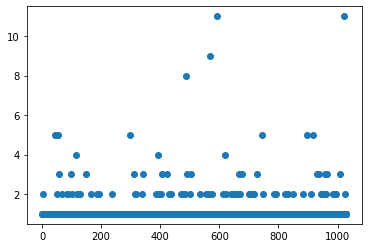

In [28]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])

La mayoría de pedidos son menores a 2, y hay valores atípicos más o menos a partir de 4 pedidos a más.

In [29]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 2., 4.])

No más del 5% realizaron 2 pedidos, y no más del 1% realizaron 4 pedidos. Por lo tanto, los usuarios que realizaron más de 4 pedidos son considerados valores anómalos.

### ingresos de los pedidos

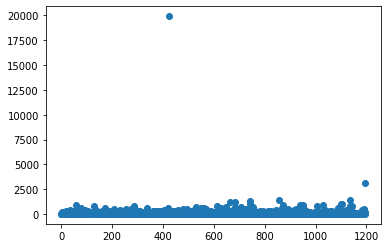

In [30]:
x_values2 = pd.Series(range(0, len(orders_data['revenue'])))
plt.scatter(x_values2, orders_data['revenue'])

La mayoría de pedidos son menores a 2000 dólares, y hay un valor atípico de 20000 dólares.

In [31]:
np.percentile(orders_data['revenue'], [90, 95, 99])

array([282.48 , 435.54 , 900.904])

No más del 5% de los pedidos cuestan 436, y no más del 1% cuestan 901. Por lo tanto, los pedidos que cuestan más de 900 pueden ser considerados atípicos.

###  significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

In [34]:
orders_by_usersA = orders_data[orders_data['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_usersA.columns = ['userId', 'orders']
orders_by_usersB = orders_data[orders_data['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_usersB.columns = ['userId', 'orders']
print(orders_by_usersA.head())
print()
print(orders_by_usersB.head())

     userId  orders
0   8300375       1
1  11685486       1
2  54447517       1
3  66685450       1
4  78758296       1

     userId  orders
0   5114589       1
1   6958315       1
2   8300375       1
3  39475350       1
4  47206413       1


In [43]:
sampleA = pd.concat([orders_by_usersA['orders'], pd.Series(0,index=np.arange(visits_data[visits_data['group'] == 'A']['visits'].sum() - len(orders_by_usersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([orders_by_usersB['orders'], pd.Series(0,index=np.arange(visits_data[visits_data['group'] == 'B']['visits'].sum() - len(orders_by_usersB['orders'])), name='orders')], axis=0)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


El valor p es menor a 0.05, entonces se rechaza la hipótesis nula, es decir, el análisis de datos en bruto mostró que si hay diferencias significativas en las tasas de conversión de ambos grupos, además el grupo B posee una ganancia de conversión relativa significativa en comparación al grupo A de un 13.8%

### significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

In [45]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_data[orders_data['group'] == 'A']['revenue'], orders_data[orders_data['group'] == 'B']['revenue'],)[1]))
print('{0:.3f}'.format(orders_data[orders_data['group'] == 'B']['revenue'].mean() / orders_data[orders_data['group'] == 'A']['revenue'].mean() - 1))

0.692
0.252


El valor p es superior a 0.05, por lo tanto, no existen diferencias estadísticamente significativas entre los tamaños de pedidos promedio de los grupos. Además, la diferencia relativa es de 25.2%.

### la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

In [54]:
userwithmanyorders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > 2]['userId'],orders_by_usersB[orders_by_usersB['orders'] > 2]['userId'],],axis=0)
usersWithExpensiveOrders = orders_data[orders_data['revenue'] > 1000]['visitorId']
abnormalUsers = (pd.concat([userwithmanyorders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
print(abnormalUsers.head())
print()
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

(29,)


Hay 29 usuarios anómalos

In [56]:
sampleAfiltered = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visits_data[visits_data['group'] == 'A']['visits'].sum() - len(orders_by_usersA['orders'])),name='orders')],axis=0)
sampleBfiltered = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visits_data[visits_data['group'] == 'B']['visits'].sum() - len(orders_by_usersB['orders'])),name='orders')],axis=0)
sampleBfiltered

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18896, dtype: int64

In [57]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleAfiltered, sampleBfiltered)[1]))
print("{0:.3f}".format(sampleBfiltered.mean() / sampleAfiltered.mean() - 1))

0.01015
0.174


Se puede decir que se ha alcanzado el nivel de significación, y el segmento B sigue siendo mejor que el A

### la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [58]:
print("{0:.3f}".format(stats.mannwhitneyu(orders_data[np.logical_and(orders_data['group'] == 'A',np.logical_not(orders_data['visitorId'].isin(abnormalUsers)),)]['revenue'],orders_data[np.logical_and(orders_data['group'] == 'B',np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print("{0:.3f}".format(orders_data[np.logical_and(orders_data['group'] == 'B',np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders_data[np.logical_and(orders_data['group'] == 'A',np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1))


0.838
-0.022


En este caso, no obtuvimos una diferencia significativa entre ambos grupos. Además el grupo B obtuvo una pérdida del -2.2% frente al grupo A.

## Conclusión general

Después de analizar los datasets se pudo concluir lo siguiente:


1. Primero, se decidió analizar las informacione de los datsets, como los tipos de columnas.
2. No se encontraron valores ausentes.
3. No se encontraron datos duplicados.
4. Se tuvo que cambiar el tipo de columna de las columnas 'date', ya que estaban en el tipo incorrecto, y se cambiaron al tipo datetime.

Asimismo, se comprobó lo siguiente:

1. La priorización de hipótesis, aplicando los framework ICE y RICE, concluyendo que hay hipótesis muy prometedoras como la 7 y 0, debido a sus buenos niveles de alcance, impacto, etc.
2. El análisis de test A/B nos mostró las siguientes conclusiones:

   2.1. Con respecto al ingreso y pedidos promedios acumulados, el grupo B le sacó ventaja al grupo A.
   
   2.2. La tasa de conversió, el grupo B logró ser en líder en la conversión desde el inicio.
   
   2.3. Se encontraron valores anómalos en el número de pedidos, los ingresos; y con los percentiles 90, 95 y 99, se pudo determinar dichos valores.
   
   2.4. Con respecto al nivel de significación, si existen diferencias significativas entre ambos grupos como en la diferencia en la conversión en los datos brutos y filtrados, pero no hay diferencias significativas con los pedidos promedio en los datos brutos y filtrados.

Después de analizar los datos y el test A/B, se puede concluir que el grupo B es el líder en este análisis, debido a que terminaba siendo el líder en distintos puntos de la prueba, como en los pedidos promedio, los ingresos acumulados y en la conversión.